<b> Problem 1: The salmonella data set from the faraway library was collected in a salmonella
reverse mutagenicity assay where the numbers of revertant colonies of TA98 Salmonella observed on each of three replicate plates for different doses of quinoline
<hr>
(a) Fit a linear model with colonies as the response and log(dose + 1) as a predictor.

(b) Make residual plots and comment on the results.

(c) Check this model for lack of fit using an appropriate test.


In [2]:
library('faraway')
library('ggplot2')
options(repr.plot.width=6, repr.plot.height=4)
data(salmonella)

In [3]:
head(salmonella, 2)

colonies,dose
15,0
21,0


<b>(a) Fit a linear model with colonies as the response and log(dose + 1) as a predictor.

In [4]:
model = lm(colonies ~ log(dose + 1), data = salmonella)

In [5]:
summary(model)


Call:
lm(formula = colonies ~ log(dose + 1), data = salmonella)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.376  -6.882  -1.509   5.400  29.119 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)     19.823      5.064   3.915  0.00123 **
log(dose + 1)    2.396      1.128   2.125  0.04955 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10.84 on 16 degrees of freedom
Multiple R-squared:  0.2201,	Adjusted R-squared:  0.1713 
F-statistic: 4.514 on 1 and 16 DF,  p-value: 0.04955


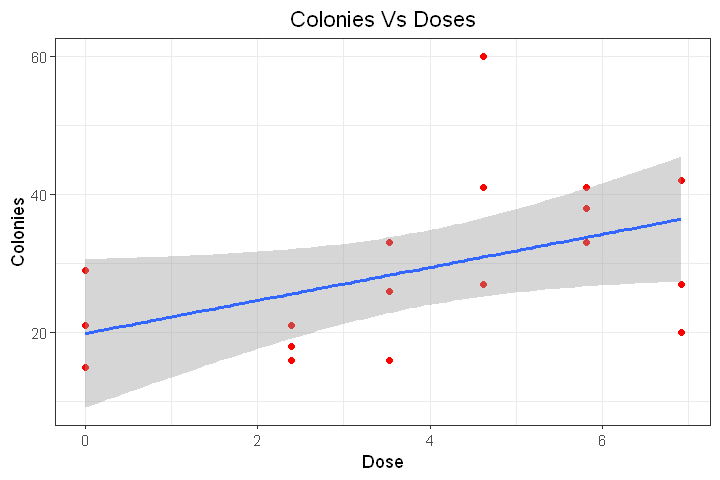

In [8]:
ggplot(data = salmonella, aes(x = log(salmonella$dose+1), y = salmonella$colonies))+
    geom_point()+
    theme_update(plot.title = element_text(hjust = 0.5))+
    theme_set(theme_bw())+
    geom_point(color='red')+
    labs(title='Colonies Vs Doses', x='Dose', y = 'Colonies')+
    geom_smooth(method = lm)

<b>(b) Make residual plots and comment on the results.

In [9]:
salmonella$residuals = model$res

In [10]:
head(salmonella)

colonies,dose,residuals
15,0,-4.823482
21,0,1.176518
29,0,9.176518
16,10,-9.568484
18,10,-7.568484
21,10,-4.568484


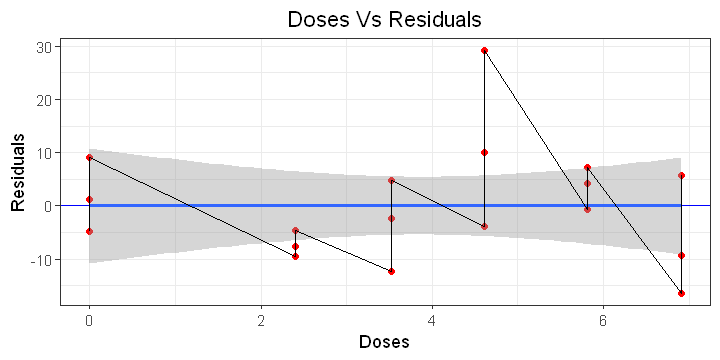

In [11]:
library('ggplot2')
options(repr.plot.width=6, repr.plot.height=3)

ggplot(data = salmonella, aes(x = log(salmonella$dose+1), y = residuals))+
    geom_point()+
    geom_hline(yintercept = 0, color = 'blue') +
    theme_update(plot.title = element_text(hjust = 0.5))+
    theme_set(theme_bw())+
    geom_point(color='red')+
    labs(title='Doses Vs Residuals', x='Doses', y = 'Residuals')+
    geom_smooth(method = lm)+
    geom_line()

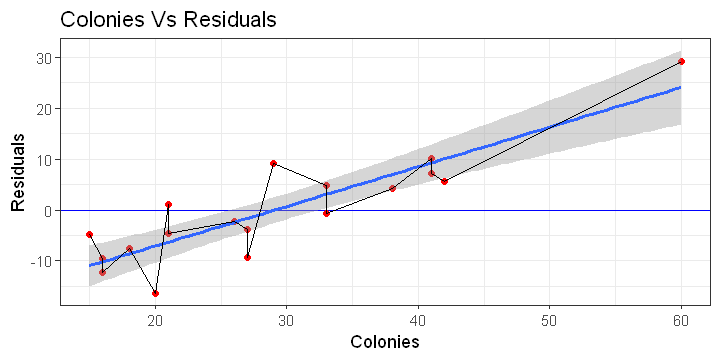

In [12]:
ggplot(data = salmonella, aes(x = salmonella$colonies, y = residuals))+
    geom_point()+
    geom_hline(yintercept = 0, color = 'blue') +
    geom_point(color='red')+
    labs(title='Colonies Vs Residuals', x='Colonies', y = 'Residuals')+
    geom_smooth(method = lm)+
    geom_line()

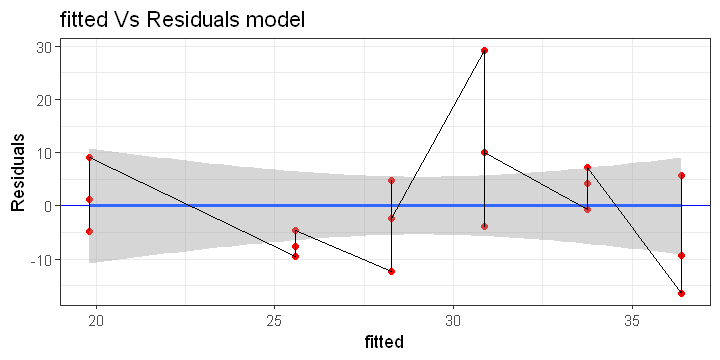

In [13]:
ggplot(data = salmonella, aes(x = model$fitted, y = residuals))+
    geom_point()+
    geom_hline(yintercept = 0, color = 'blue') +
    geom_point(color='red')+
    labs(title='fitted Vs Residuals model', x='fitted', y = 'Residuals')+
    geom_smooth(method = lm)+
    geom_line()

* When we make residuals vs doses plot, we can see that there is no clear relationship that emerges.
* When we make residuals vs colonies plot, linear relationship is seen.
* When we make residuals vs fitted plot, no clear relationship emerges. To confirm, we can perform Durbin-Watson test.

In [16]:
# install.packages('lmtest')
library('lmtest')
dwtest(model)


	Durbin-Watson test

data:  model
DW = 1.6279, p-value = 0.1382
alternative hypothesis: true autocorrelation is greater than 0


* The p value is greater than 5% significance level, hence we accept null hypothesis. i.e. residuals are not correlated.

<b>(c) Check this model for lack of fit using an appropriate test.

* Since we do not know the sigma value of each $X_i$, hence we need to check lack of fit when sigma unknown

In [17]:
head(salmonella, 2)

colonies,dose,residuals
15,0,-4.823482
21,0,1.176518


In [18]:
salmonella[order(salmonella$colonies),]

,colonies,dose,residuals
1,15,0,-4.8234823
4,16,10,-9.5684844
7,16,33,-12.2721201
5,18,10,-7.5684844
16,20,1000,-16.3758360
2,21,0,1.1765177
6,21,10,-4.5684844
8,26,33,-2.2721201
10,27,100,-3.8806279
17,27,1000,-9.3758360


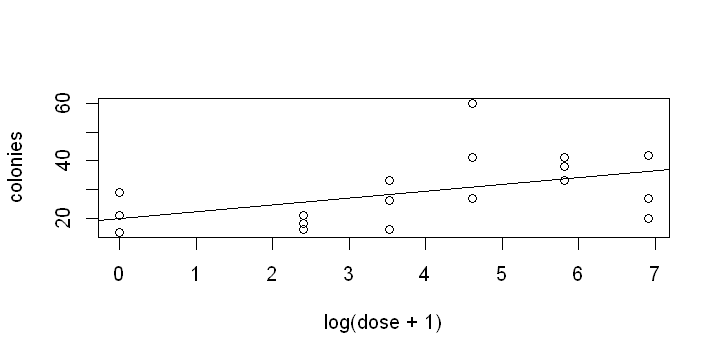

In [19]:
model_a = lm(colonies ~ log(dose + 1), data = salmonella);
plot(colonies ~ log(dose + 1), data=salmonella); abline(coef(model_a));

In [20]:
model_b = lm(colonies ~ factor(log(dose + 1)), data = salmonella);

cbind(salmonella, model_b$fitted)[order(salmonella$colonies),]

,colonies,dose,residuals,model_b$fitted
1,15,0,-4.8234823,21.66667
4,16,10,-9.5684844,18.33333
7,16,33,-12.2721201,25.00000
5,18,10,-7.5684844,18.33333
16,20,1000,-16.3758360,29.66667
2,21,0,1.1765177,21.66667
6,21,10,-4.5684844,18.33333
8,26,33,-2.2721201,25.00000
10,27,100,-3.8806279,42.66667
17,27,1000,-9.3758360,29.66667


In [21]:
summary(model_b)


Call:
lm(formula = colonies ~ factor(log(dose + 1)), data = salmonella)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.667  -3.917  -0.500   3.417  17.333 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)   
(Intercept)                             21.667      5.506   3.935  0.00198 **
factor(log(dose + 1))2.39789527279837   -3.333      7.787  -0.428  0.67617   
factor(log(dose + 1))3.52636052461616    3.333      7.787   0.428  0.67617   
factor(log(dose + 1))4.61512051684126   21.000      7.787   2.697  0.01942 * 
factor(log(dose + 1))5.8111409929767    15.667      7.787   2.012  0.06722 . 
factor(log(dose + 1))6.90875477931522    8.000      7.787   1.027  0.32449   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.536 on 12 degrees of freedom
Multiple R-squared:  0.5475,	Adjusted R-squared:  0.359 
F-statistic: 2.904 on 5 and 12 DF,  p-value: 0.06047


In [22]:
anova(model_a, model_b)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
16,1881.063,NA,NA,NA,NA
12,1091.333,4,789.7299,2.170913,0.1341968


In [23]:
1-pf(2.170913,4,12)

[1] 0.1341968

* Since p value is greater than 5% significance level, we accept null hypothesis. We can say that there is no lack of fit.

<b>
Problem 2: The gammaray data set from the faraway library includes X-ray decay light curve of Gamma ray burst 050525a obtained with the X-Ray Telescope (XRT) on board the Swift satellite. The data set has 63 brightness measurements in the 0.4-4.5 keV spectral band at times ranging from 2 minutes to 5 days after the burst. An appropriate model to predict flux as a function of time using appropriate weights is required.
 <hr>
(a) Find an appropriate linearizing transformation for either the response, the predictor or both if necessary.
    
(b) Fit a regression model to predict flux as a function of time, using the proposed trans-formation in part a) and appropriate weights. Note that the measurement error of the flux is available in the data set.
    
(c) Inspect the resulting model residuals and comment on your results
    
(d) In case the residuals do not have an appropriate behavior propose a new model for this data set.

In [24]:
data(gammaray)
head(gammaray,2)

time,flux,error
133,122.7,5.7
143,109.5,5.4


<b>(a) Find an appropriate linearizing transformation for either the response, the predictor or both if necessary.

In [25]:
mod_a = lm(flux ~ time, data = gammaray)

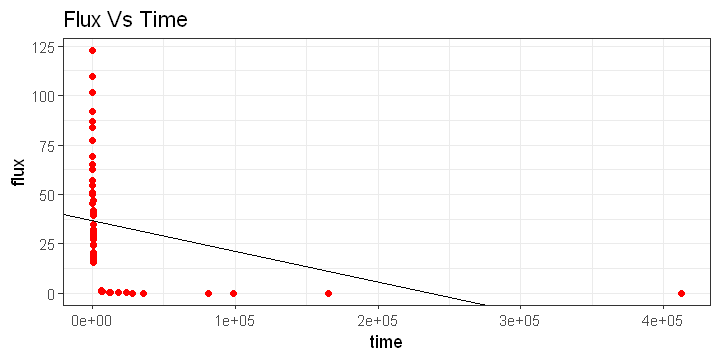

In [26]:
ggplot(data = gammaray, aes(x = time, y = flux))+
    geom_point()+
    geom_point(color='red')+
    labs(title='Flux Vs Time', x='time', y = 'flux')+
    geom_abline(intercept = mod_a$coef[1], slope= mod_a$coef[2])

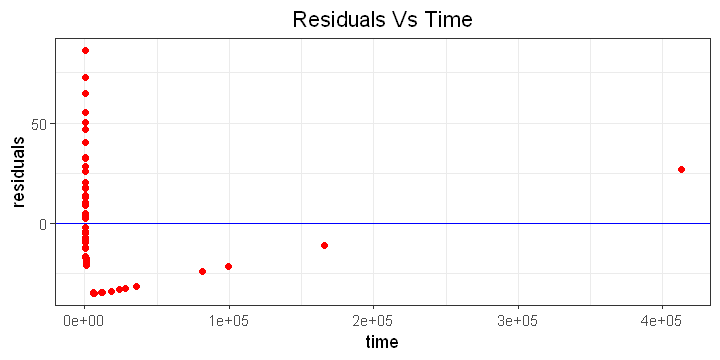

In [27]:
ggplot(data = gammaray, aes(x = time, y = mod_a$res))+
    geom_point()+
    geom_hline(yintercept = 0, color = 'blue') +
    theme_update(plot.title = element_text(hjust = 0.5))+
    theme_set(theme_bw())+
    labs(title='Residuals Vs Time', x='time', y = 'residuals')+
    geom_point(color='red')

* Since the time is varying with exponentially, lets apply log to time

In [28]:
mod_b = lm(flux ~ log(time), data = gammaray)

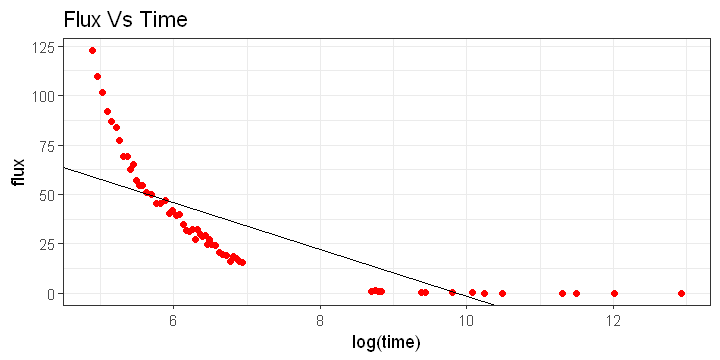

In [29]:
ggplot(data = gammaray, aes(x = log(time), y = flux))+
    geom_point()+
    geom_point(color='red')+
    labs(title='Flux Vs Time', x='log(time)', y = 'flux')+
    geom_abline(intercept = mod_b$coef[1], slope= mod_b$coef[2])

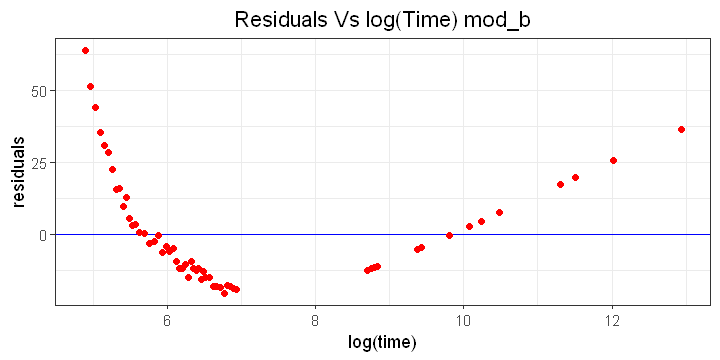

In [30]:
ggplot(data = gammaray, aes(x = log(time), y = mod_b$res))+
    geom_point()+
    geom_hline(yintercept = 0, color = 'blue') +
    theme_update(plot.title = element_text(hjust = 0.5))+
    theme_set(theme_bw())+
    labs(title='Residuals Vs log(Time) mod_b', x='log(time)', y = 'residuals')+
    geom_point(color='red')

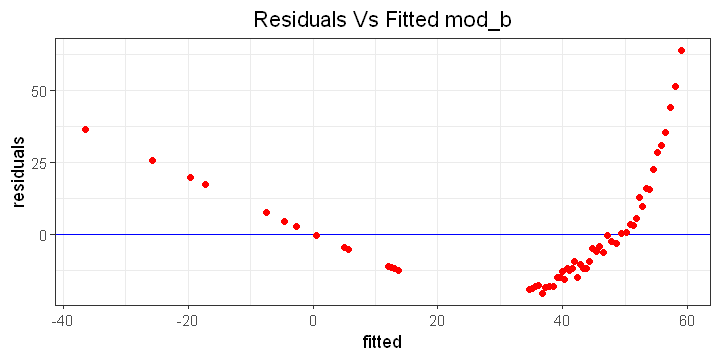

In [31]:
ggplot(data = gammaray, aes(x = mod_b$fitted, y = mod_b$res))+
    geom_point()+
    geom_hline(yintercept = 0, color = 'blue') +
    theme_update(plot.title = element_text(hjust = 0.5))+
    theme_set(theme_bw())+
    labs(title='Residuals Vs Fitted mod_b', x='fitted', y = 'residuals')+
    geom_point(color='red')

* The lm model is still not fitting well on the data, there appears to be log linear relationship.
* Lets also apply log transformation to response variable as well.

In [32]:
mod_c = lm(log(flux) ~ log(time), data = gammaray)

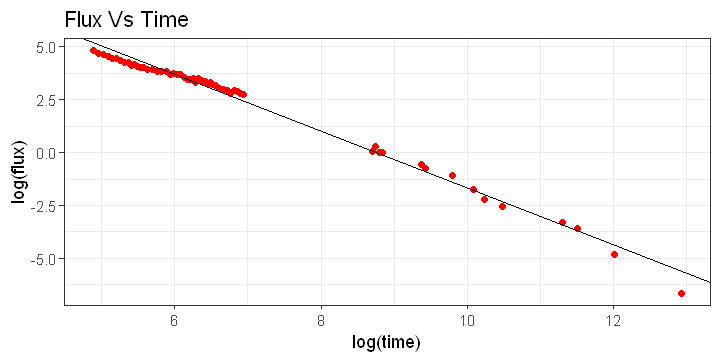

In [33]:
ggplot(data = gammaray, aes(x = log(time), y = log(flux)))+
    geom_point()+
    geom_point(color='red')+
    labs(title='Flux Vs Time', x='log(time)', y = 'log(flux)')+
    geom_abline(intercept = mod_c$coef[1], slope= mod_c$coef[2])

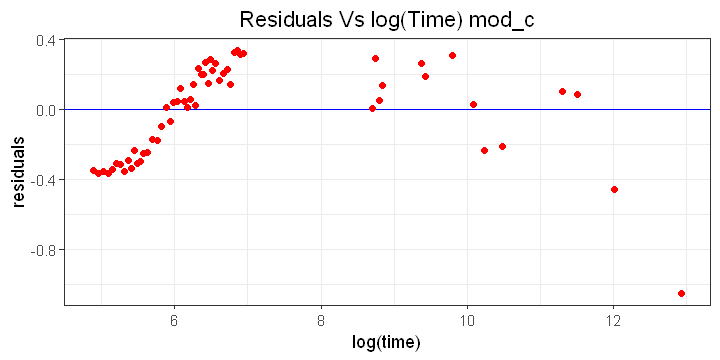

In [34]:
ggplot(data = gammaray, aes(x = log(time), y = mod_c$res))+
    geom_point()+
    geom_hline(yintercept = 0, color = 'blue') +
    theme_update(plot.title = element_text(hjust = 0.5))+
    theme_set(theme_bw())+
    labs(title='Residuals Vs log(Time) mod_c', x='log(time)', y = 'residuals')+
    geom_point(color='red')

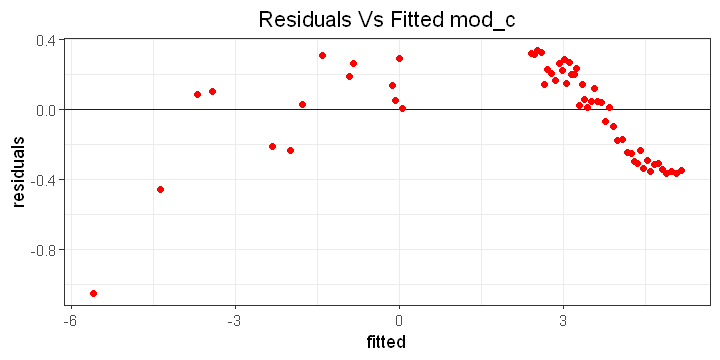

In [35]:
ggplot(data = gammaray, aes(x = mod_c$fitted, y = mod_c$res))+
    geom_point()+
    geom_hline(yintercept = 0, color = 'blue') +
    theme_update(plot.title = element_text(hjust = 0.5))+
    theme_set(theme_bw())+
    labs(title='Residuals Vs Fitted mod_c', x='fitted', y = 'residuals')+
    geom_point(color='red')

* We can see that transorming both response and predictor with log, the lm model is fitting better on the data.
* The residuals look like auto correlated with time. The value of a residual at a particular point depend upon value of preceding residual.

In [46]:
dwtest(mod_c)


	Durbin-Watson test

data:  mod_c
DW = 0.2978, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


* The low p value of Durbin-Watson test indicates that residuals are highly correlated and they depend upon value of preceding residual.

<b>(b) Fit a regression model to predict flux as a function of time, using the proposed trans-formation in part a) and appropriate weights. Note that the measurement error of the flux is available in the data set.

In [25]:
mod_d = lm(log(flux) ~ log(time), data = gammaray, weights = 1/error^2)

<b>(c) Inspect the resulting model residuals and comment on your results

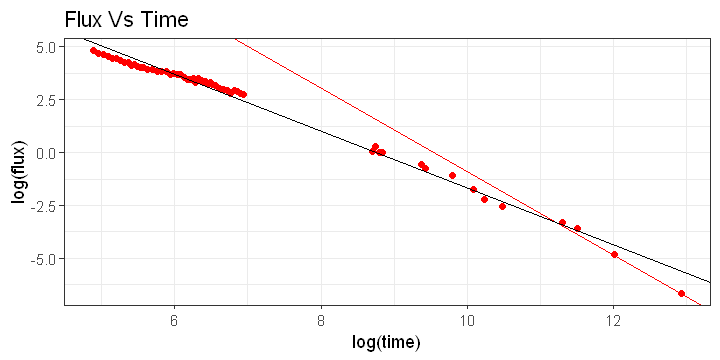

In [26]:
ggplot(data = gammaray, aes(x = log(time), y = log(flux)))+
    geom_point()+
    geom_point(color='red')+
    labs(title='Flux Vs Time', x='log(time)', y = 'log(flux)')+
    geom_abline(intercept = mod_d$coef[1], slope= mod_d$coef[2], color='red')+
    geom_abline(intercept = mod_c$coef[1], slope= mod_c$coef[2], color='black')

* Red color line is the fitted line after using $weights = \frac{1}{sd^2}$.

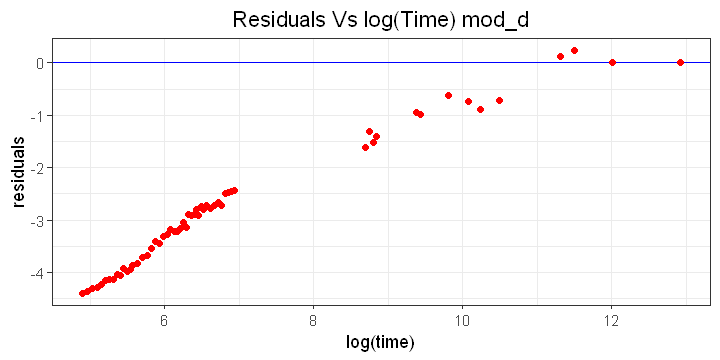

In [27]:
ggplot(data = gammaray, aes(x = log(time), y = mod_d$res))+
    geom_point()+
    geom_hline(yintercept = 0, color = 'blue') +
    theme_update(plot.title = element_text(hjust = 0.5))+
    theme_set(theme_bw())+
    labs(title='Residuals Vs log(Time) mod_d', x='log(time)', y = 'residuals')+
    geom_point(color='red')

* When we use the weights (variance) of $X_i $, the lm model is fitted with below condition.
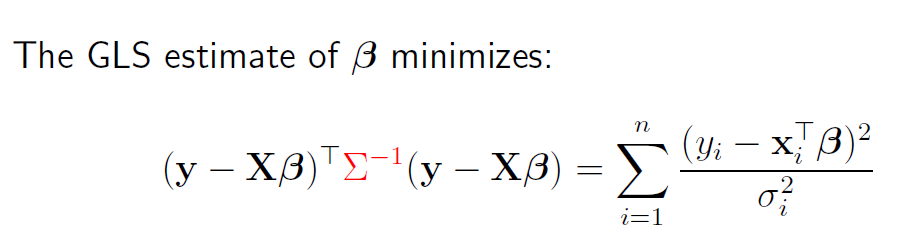

* Since we are using $weights = \frac{1}{sd^2}$, More the variance at a particular $X_i$, lesser weightage will be given to that point while fitting the model.
* We can see that the residuals are still highly correlated. The value of a residual at a particular point depend upon value of preceding residual.

<b>(d) In case the residuals do not have an appropriate behavior propose a new model for this data set.

* We can fit a regression model with autocorrelated errors.

In [28]:
library(nlme)
mod_e = gls(log(flux) ~ log(time), correlation = corARMA(p=1), data = gammaray)
summary(mod_e)

Generalized least squares fit by REML
  Model: log(flux) ~ log(time) 
  Data: gammaray 
        AIC       BIC   logLik
  -56.17774 -47.73424 32.08887

Correlation Structure: AR(1)
 Formula: ~1 
 Parameter estimate(s):
      Phi 
0.9915039 

Coefficients:
                Value Std.Error   t-value p-value
(Intercept) 12.735637 1.0804917  11.78689       0
log(time)   -1.524327 0.0580027 -26.28027       0

 Correlation: 
          (Intr)
log(time) -0.456

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-0.4390054 -0.1295899  0.3330974  0.5231954  1.1090042 

Residual standard error: 1.081339 
Degrees of freedom: 63 total; 61 residual

In [29]:
intervals(mod_e)

Approximate 95% confidence intervals

 Coefficients:
                lower      est.     upper
(Intercept) 10.575060 12.735637 14.896214
log(time)   -1.640311 -1.524327 -1.408344
attr(,"label")
[1] "Coefficients:"

 Correlation structure:
         lower      est.     upper
Phi -0.9636544 0.9915039 0.9999993
attr(,"label")
[1] "Correlation structure:"

 Residual standard error:
       lower         est.        upper 
9.793398e-03 1.081339e+00 1.193961e+02 

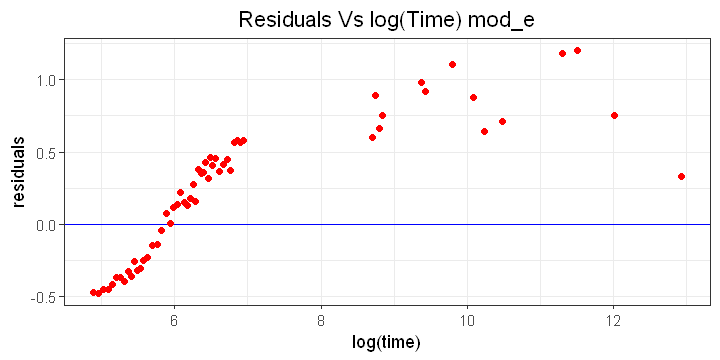

In [31]:
ggplot(data = gammaray, aes(x = log(time), y = mod_e$res))+
    geom_point()+
    geom_hline(yintercept = 0, color = 'blue') +
    theme_update(plot.title = element_text(hjust = 0.5))+
    theme_set(theme_bw())+
    labs(title='Residuals Vs log(Time) mod_e', x='log(time)', y = 'residuals')+
    geom_point(color='red')

<b>
Problem 3: The divusa data set from the faraway library reports the divorce rate in the USA from 1920-1996. Fit a regression model with divorce as the response and unemployed, femlab, marriage, birth and military as predictors.
    <hr>
(a) Make a residual plot against year. Do you think the residuals are auto-correlated? Why?

(b) Make a formal test for the autocorrelation of the residuals.

(c) Assume the residuals behave as an autoregressive model of order 1 (AR(1))1. Use the function gls from the library nlme to fit a regression model to the variable divorce as a response and the unemployed, femlab, marriage, birth and military as predictors. Use the option correlation = corAR1( form = ~ year) and method = "ML". Make sure you do >help(gls) before fitting the model, in order to understand the meaning of the parameters correlation and method in the gls function call.

(d) What is the estimated autocorrelation coeffcient? Is this coefficient significant? Hint: Use function intervals to get the CI.

(e) Discuss whether the GLS model change which variables are found significant when compared to the LM model.

(f) Comment on why there might be correlation in the errors.

In [223]:
data(divusa)
head(divusa,2)

year,divorce,unemployed,femlab,marriage,birth,military
1920,8.0,5.2,22.70,92,117.9,3.2247
1921,7.2,11.7,22.79,83,119.8,3.5614


In [242]:
mod_a = lm(divorce ~ unemployed + femlab + marriage + birth + military, data = divusa)
summary(mod_a)


Call:
lm(formula = divorce ~ unemployed + femlab + marriage + birth + 
    military, data = divusa)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8611 -0.8916 -0.0496  0.8650  3.8300 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.48784    3.39378   0.733   0.4659    
unemployed  -0.11125    0.05592  -1.989   0.0505 .  
femlab       0.38365    0.03059  12.543  < 2e-16 ***
marriage     0.11867    0.02441   4.861 6.77e-06 ***
birth       -0.12996    0.01560  -8.333 4.03e-12 ***
military    -0.02673    0.01425  -1.876   0.0647 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.65 on 71 degrees of freedom
Multiple R-squared:  0.9208,	Adjusted R-squared:  0.9152 
F-statistic: 165.1 on 5 and 71 DF,  p-value: < 2.2e-16


<b>(a) Make a residual plot against year. Do you think the residuals are auto-correlated? Why?

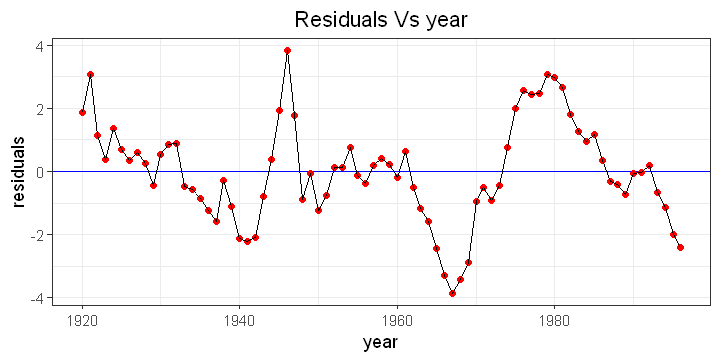

In [231]:
ggplot(data = divusa, aes(x = divusa$year, y = mod_a$res))+
    geom_point()+
    geom_hline(yintercept = 0, color = 'blue') +
    theme_update(plot.title = element_text(hjust = 0.5))+
    theme_set(theme_bw())+
    labs(title='Residuals Vs year', x='year', y = 'residuals')+
    geom_point(color='red')+
    geom_line()

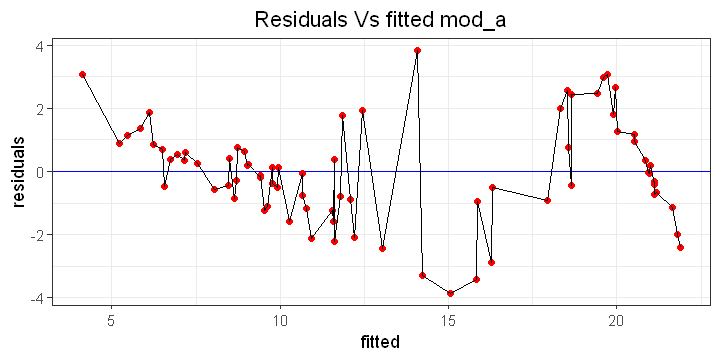

In [225]:
ggplot(data = divusa, aes(x = mod_a$fitted, y = mod_a$res))+
    geom_point()+
    geom_hline(yintercept = 0, color = 'blue') +
    theme_update(plot.title = element_text(hjust = 0.5))+
    theme_set(theme_bw())+
    labs(title='Residuals Vs fitted mod_a', x='fitted', y = 'residuals')+
    geom_point(color='red')+
    geom_line()

* We can see that the residuals are still highly correlated. They follow a trend. The value of a residual at a particular point depends upon value of preceding residual.

<b>(b) Make a formal test for the autocorrelation of the residuals.

In [226]:
dwtest(mod_a)


	Durbin-Watson test

data:  mod_a
DW = 0.29988, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


* Here, the null hypothesis is that the errors are not correlated, and alternative hypothesis is that the errors are correlated.
* By performing Durbin-Watson test, we got a very low p value. Hence we reject the null hypothesis and accept that the errors are highly correlated.

<b>(c) Assume the residuals behave as an autoregressive model of order 1 (AR(1))1. Use the function gls from the library nlme to fit a regression model to the variable divorce as a response and the unemployed, femlab, marriage, birth and military as predictors. Use the option correlation = corAR1( form = ~ year) and method = "ML". Make sure you do >help(gls) before fitting the model, in order to understand the meaning of the parameters correlation and method in the gls function call.

In [233]:
mod_b = gls(divorce ~  unemployed + femlab + marriage + birth + military, correlation = corAR1(form= ~ year), 
            method = "ML", data = divusa)
summary(mod_b)

Generalized least squares fit by maximum likelihood
  Model: divorce ~ unemployed + femlab + marriage + birth + military 
  Data: divusa 
       AIC      BIC    logLik
  179.9523 198.7027 -81.97613

Correlation Structure: AR(1)
 Formula: ~year 
 Parameter estimate(s):
      Phi 
0.9715486 

Coefficients:
                Value Std.Error   t-value p-value
(Intercept) -7.059682  5.547193 -1.272658  0.2073
unemployed   0.107643  0.045915  2.344395  0.0219
femlab       0.312085  0.095151  3.279878  0.0016
marriage     0.164326  0.022897  7.176766  0.0000
birth       -0.049909  0.022012 -2.267345  0.0264
military     0.017946  0.014271  1.257544  0.2127

 Correlation: 
           (Intr) unmply femlab marrig birth 
unemployed -0.420                            
femlab     -0.802  0.240                     
marriage   -0.516  0.607  0.307              
birth      -0.379  0.041  0.066 -0.094       
military   -0.036  0.436 -0.311  0.530  0.128

Standardized residuals:
       Min         Q1      

<b>(d) What is the estimated autocorrelation coefficient? Is this coeffcient significant? Hint: Use function intervals to get the CI.

* We know that residuals follow a model of the form: $e_{t + 1} = \phi e_t + \gamma_t$. Here, $\phi$ is the autocorrelation coefficient.
* By fitting generalized least squares model with correlation, we got $\phi$ value as 0.9715486.
* To check its significance, we can check confidence interval of $\phi$.

In [234]:
intervals(mod_b)

Approximate 95% confidence intervals

 Coefficients:
                   lower        est.        upper
(Intercept) -18.12047043 -7.05968166  4.001107109
unemployed    0.01609101  0.10764313  0.199195251
femlab        0.12235846  0.31208493  0.501811412
marriage      0.11867101  0.16432630  0.209981587
birth        -0.09380023 -0.04990919 -0.006018159
military     -0.01050915  0.01794640  0.046401944
attr(,"label")
[1] "Coefficients:"

 Correlation structure:
        lower      est.     upper
Phi 0.6529393 0.9715486 0.9980183
attr(,"label")
[1] "Correlation structure:"

 Residual standard error:
     lower       est.      upper 
 0.7976096  2.9076645 10.5998135 

* We can see that the 95% CI of $\phi$ is greater than 0. Hence this coefficient is significant.

<b>(e) Discuss whether the GLS model change which variables are found significant when compared to the LM model.

In [240]:
summary(mod_a)


Call:
lm(formula = divorce ~ unemployed + femlab + marriage + birth + 
    military, data = divusa)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8611 -0.8916 -0.0496  0.8650  3.8300 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.48784    3.39378   0.733   0.4659    
unemployed  -0.11125    0.05592  -1.989   0.0505 .  
femlab       0.38365    0.03059  12.543  < 2e-16 ***
marriage     0.11867    0.02441   4.861 6.77e-06 ***
birth       -0.12996    0.01560  -8.333 4.03e-12 ***
military    -0.02673    0.01425  -1.876   0.0647 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.65 on 71 degrees of freedom
Multiple R-squared:  0.9208,	Adjusted R-squared:  0.9152 
F-statistic: 165.1 on 5 and 71 DF,  p-value: < 2.2e-16


* In lm model, femlab, marriage, and birth are found to be significant at 5% significance level.

In [243]:
summary(mod_b)

Generalized least squares fit by maximum likelihood
  Model: divorce ~ unemployed + femlab + marriage + birth + military 
  Data: divusa 
       AIC      BIC    logLik
  179.9523 198.7027 -81.97613

Correlation Structure: AR(1)
 Formula: ~year 
 Parameter estimate(s):
      Phi 
0.9715486 

Coefficients:
                Value Std.Error   t-value p-value
(Intercept) -7.059682  5.547193 -1.272658  0.2073
unemployed   0.107643  0.045915  2.344395  0.0219
femlab       0.312085  0.095151  3.279878  0.0016
marriage     0.164326  0.022897  7.176766  0.0000
birth       -0.049909  0.022012 -2.267345  0.0264
military     0.017946  0.014271  1.257544  0.2127

 Correlation: 
           (Intr) unmply femlab marrig birth 
unemployed -0.420                            
femlab     -0.802  0.240                     
marriage   -0.516  0.607  0.307              
birth      -0.379  0.041  0.066 -0.094       
military   -0.036  0.436 -0.311  0.530  0.128

Standardized residuals:
       Min         Q1      

* With GLS model, unemployed, femlab, marriage and birth are found to be significant at 5% significance level.
* Compared to linear model, unemployed is also found to be significant in generalized linear sqaures model.

<b>(f) Comment on why there might be correlation in the errors.

* There might be correlation in the errors due to following reason:
<ol><li>The correlation between errors occurs mostly in time series data. The observation at a particular time $t$ is affected by observation taken at time $t-1$ or $t-2$. This observations affects the residuals and hence they become correlated.</li></ol>

<hr>